In [1]:
import tribolium_clustering as tc
import pandas as pd
import pyclesperanto_prototype as cle
from sklearn.metrics import adjusted_rand_score, v_measure_score

lund_folder = tc.get_folder_path('lund dataset')
lund = tc.processed_dataset(lund_folder)

In [3]:
def embryo_serosa_preprocessing(regprops):
    from sklearn.preprocessing import StandardScaler
    import umap
    aspectrat = tc.min_maj_ax_to_aspectr(regprops,del_min_maj=False)
    subselection = ['area', 'bbox_area', 'extent', 'feret_diameter_max', 'max_intensity',
                    'mean_intensity', 'min_intensity', 'solidity', 'centroid-0',
                    'centroid-1', 'centroid-2', 'image_stdev',
                    'avg distance of 6 closest points',
                    'stddev distance of 6 closest points', 'touching neighbor count',
                    'aspect_ratio']
    subselected = aspectrat[subselection]
    
    scaler = StandardScaler()
    scaled = scaler.fit_transform(subselected)
    
    return scaled

processed_complete_props = embryo_serosa_preprocessing(lund.get_combined_regionprops())

from sklearn.cluster import KMeans

kmeans_clust = KMeans(n_clusters=2,max_iter=10000, init= 'k-means++', random_state=42)

all_predictions = kmeans_clust.fit_predict(processed_complete_props)

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Lund Gastrulation Correct voxel sizes//


In [10]:
def only_annotated_cells_prediction_list(dataset,timepoint,
                                         prediction_list_timepoint,
                                         annotation_folder,annotation_file_name_prefix,annotation_column_name,
                                         ):
    import pandas as pd
    from pyclesperanto_prototype import statistics_of_background_and_labelled_pixels
    from skimage.io import imread
    
    dictinput = {'prediction':prediction_list_timepoint}
    cluster_prediction_csv = pd.DataFrame(dictinput)
    
    labels = dataset.get_labels(timepoint)
    annotation_img = imread(annotation_folder+ 
                              annotation_file_name_prefix + 
                              't{}.tif'.format(timepoint))
    

    cle_regionp = statistics_of_background_and_labelled_pixels(annotation_img,labels)
    annotated_labels = cle_regionp['max_intensity'][1:].astype('uint8')
    
    annotation_df = pd.DataFrame({annotation_column_name:annotated_labels})
    cluster_pred_and_annotation = pd.concat([cluster_prediction_csv,annotation_df], axis = 1)
    
    only_annotated_subset = cluster_pred_and_annotation[cluster_pred_and_annotation[annotation_column_name]>0]
    return only_annotated_subset


def combined_list_to_timepoint_list(dataset,combined_list):
    cum_indices = dataset.cumulative_label_lengths()

    output = [combined_list[cum_indices[timepoint]:cum_indices[timepoint+1]] 
              for timepoint,nothing in enumerate(dataset.timepoints)]
    
    return output


individual_predictions = combined_list_to_timepoint_list(lund,all_predictions)

annotated_t3 = only_annotated_cells_prediction_list(lund,3,
                                            individual_predictions[3],            
                                            lund_folder,'serosa embryo annotation rescaled ','serosa_embryo_labels',
                                           )
    

No Predictions in Regionprops of C:/Users/ryans/Documents/output data (big)/Lund Gastrulation Correct voxel sizes//


C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\pyopencl\__init__.py:267: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\pyopencl\__init__.py:267: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\pyopencl\__init__.py:267: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
C:\Users\ryans\Anaconda3\envs\mstr_v1\lib\site-packages\pyopencl\__init__.py:267: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
 

In [12]:
import numpy as np
indies = np.array(range(0,22,3))
np.array(range(0,22,3))

array([ 0,  3,  6,  9, 12, 15, 18, 21])

In [13]:
annotated_dataframes = [only_annotated_cells_prediction_list(lund,i,
                        individual_predictions[i],            
                        lund_folder,'serosa embryo annotation rescaled ','serosa_embryo_labels',
                        ) for i in indies]

In [15]:
rand_scores = [adjusted_rand_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
               for annotated in annotated_dataframes]

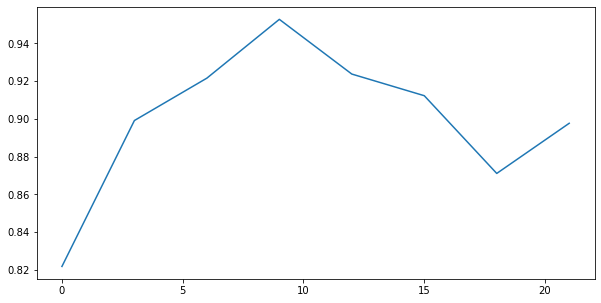

In [16]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(indies,rand_scores)

In [18]:
v_measures= [v_measure_score(annotated['prediction'],
                                   annotated['serosa_embryo_labels']) 
               for annotated in annotated_dataframes]

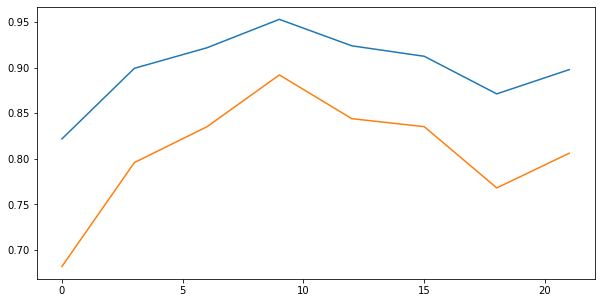

In [19]:
fig,ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(indies,rand_scores)
ax.plot(indies,v_measures)

In [40]:
finsterwalde_folder = tc.get_folder_path('Finsterwalde Labels Folder')
finsterwalder_emb_ser_clustering_folder = tc.get_folder_path('embryo serosa clustering FInsterwalde')
finster = tc.processed_dataset(finsterwalde_folder)

In [49]:
finsterwalde_annotated_timepoints = [0,3,6,9,12,15,20,25,31]
finster_rand, finster_v = get_rand_score_and_v_measure(finster,finsterwalde_annotated_timepoints,
                                                       finsterwalder_emb_ser_clustering_folder,
                                                       'regprops with embryo serosa clustering UMAP(nn 400, mindist 0), hdbscan(mincl size 2000) ',
                                                       finsterwalde_folder,
                                                       'serosa embryo annotation rescaled ',
                                                       'serosa_embryo_labels'
                                                      )

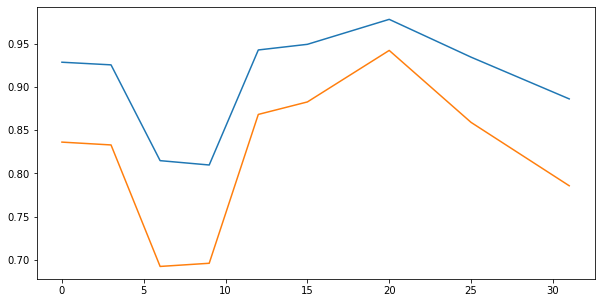

In [43]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(finsterwalde_annotated_timepoints,finster_rand)
ax.plot(finsterwalde_annotated_timepoints,finster_v)

In [44]:
wolgast_folder = tc.get_folder_path('Wolgast Labels Folder')
wolgast_emb_ser_clustering_folder = tc.get_folder_path('embryo serosa clustering Wolgast')

In [45]:
wolgast = tc.processed_dataset(wolgast_folder)

In [47]:
finsterwalde_annotated_timepoints = [0,3,6,9,12,15,20,25,31]
wolgast_rand, wolgast_v = get_rand_score_and_v_measure(wolgast,finsterwalde_annotated_timepoints,
                                                       wolgast_emb_ser_clustering_folder,
                                                       'regprops with embryo serosa clustering UMAP(nn 400, mindist 0), hdbscan(mincl size 2000) ',
                                                       wolgast_folder,
                                                       'serosa embryo annotation rescaled ',
                                                       'serosa_embryo_labels'
                                                      )

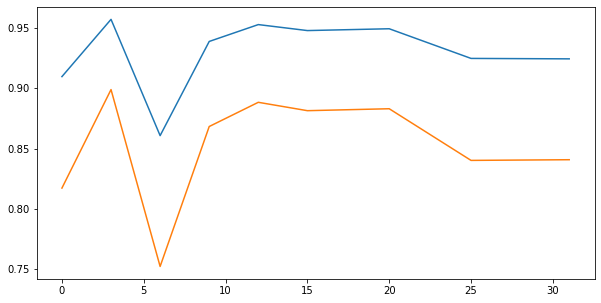

In [48]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
ax.plot(finsterwalde_annotated_timepoints,wolgast_rand)
ax.plot(finsterwalde_annotated_timepoints,wolgast_v)

(0.0, 210.0)

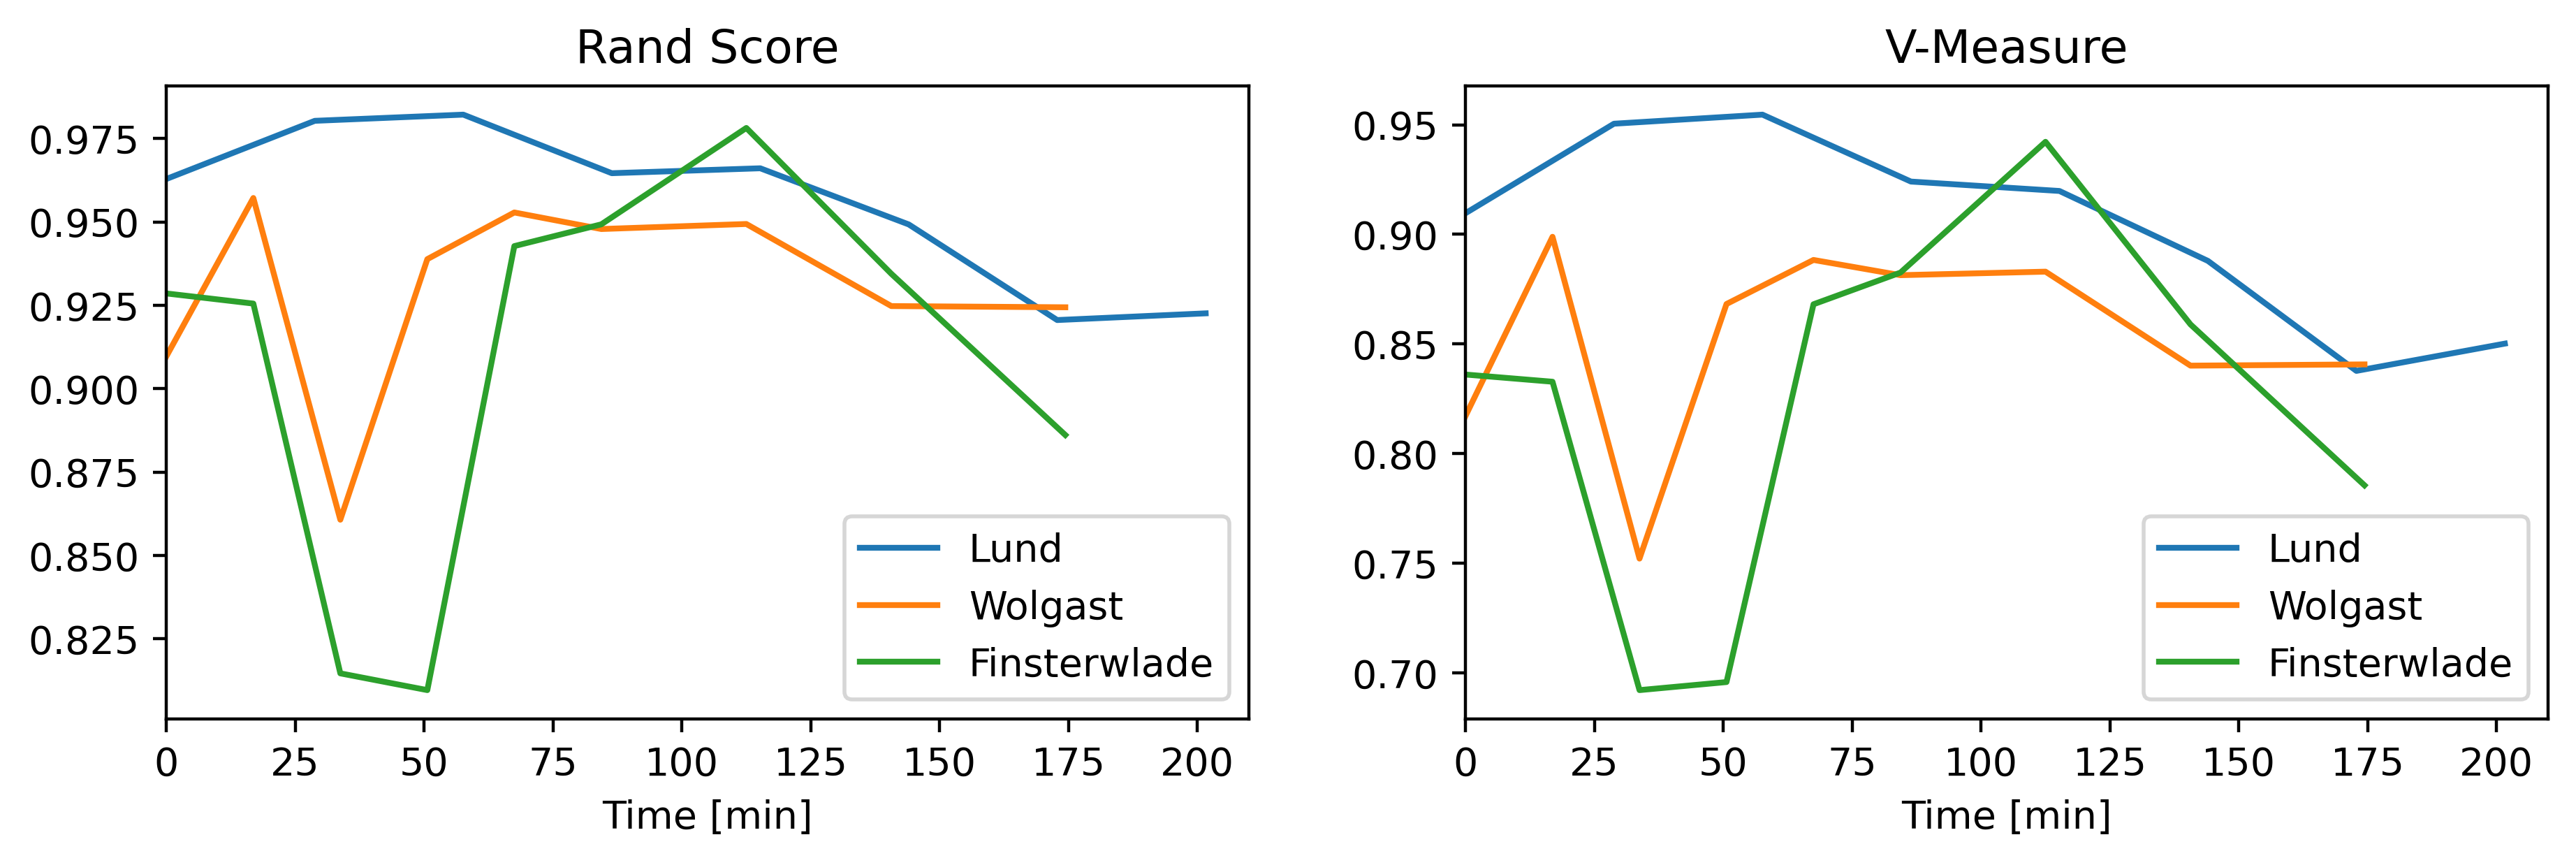

In [73]:
import beetlesafari as bs
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

timeslice_lund = bs.seconds_to_minutes(bs.hours_to_seconds(4/25))
lund_time_in_min = np.array(indies)* timeslice_lund

timeslice_duration = bs.hours_to_seconds(3)/32
timeslice_duration_mi = bs.seconds_to_minutes(timeslice_duration)
x_axis_finster_wolgast = np.array(finsterwalde_annotated_timepoints)*timeslice_duration_mi


fig, (ax1,ax2) = plt.subplots(1,2,figsize = (11,3))
ax1.plot(lund_time_in_min,rand_scores_non_noise,label='Lund')
ax1.plot(x_axis_finster_wolgast,wolgast_rand,label='Wolgast')
ax1.plot(x_axis_finster_wolgast,finster_rand,label='Finsterwlade')

handles, labels = ax1.get_legend_handles_labels()
# reverse the order
ax1.legend(handles, labels)
ax1.set_title('Rand Score')
ax1.set_xlabel('Time [min]')
ax1.set_xlim([0,210])


ax2.plot(lund_time_in_min,v_measures_non_noise,label='Lund')
ax2.plot(x_axis_finster_wolgast,wolgast_v,label='Wolgast')
ax2.plot(x_axis_finster_wolgast,finster_v,label='Finsterwlade')

handles2, labels2 = ax2.get_legend_handles_labels()
# reverse the order
ax2.legend(handles, labels)
ax2.set_title('V-Measure')
ax2.set_xlabel('Time [min]')

ax2.set_xlim([0,210])